In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

import joblib


# DATA PREPARATION

In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
# The dataset is loaded
df = pd.read_csv('C:/Users/HP/Desktop/data science/dataset/Student_Mental_health.csv')

In [5]:
# Drop the Timestamp column
df = df.drop(columns=["Timestamp"])

In [6]:
# The first 5 rows of the dataset are displayed
df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [7]:
# Display the raw dataset
df

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


EXPLORATORY DATA ANALYSIS #1 : Data Summary

In [8]:
# Dataset summary
print("Dataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Choose your gender                            101 non-null    object 
 1   Age                                           100 non-null    float64
 2   What is your course?                          101 non-null    object 
 3   Your current year of Study                    101 non-null    object 
 4   What is your CGPA?                            101 non-null    object 
 5   Marital status                                101 non-null    object 
 6   Do you have Depression?                       101 non-null    object 
 7   Do you have Anxiety?                          101 non-null    object 
 8   Do you have Panic attack?                     101 non-null    object 
 9   Did you seek any specialist for a treatment?  101 n

### DATA CLEANING #1

- Column Names: Leading and trailing spaces in column names are stripped using df.columns.str.strip().
- Year of Study: The column 'Your current year of Study' is converted to lowercase, stripped of spaces, and numeric values are extracted using regex (str.extract("(\d+)")), then converted to integers.

In [9]:
# Strip column names of leading/trailing spaces
df.columns = df.columns.str.strip()

# Fix any known inconsistent values (e.g., "Year 1" vs "year 1")
df['Your current year of Study'] = df['Your current year of Study'].str.lower().str.strip()

df["Your current year of Study"] = (
    df["Your current year of Study"].str.extract("(\d+)").astype(int)
)


# Convert 'What is your CGPA?' to numeric (midpoint of ranges)
def convert_cgpa(cgpa):
    if isinstance(cgpa, str) and "-" in cgpa:
        # If the value is a string and contains a range, calculate the midpoint
        low, high = map(float, cgpa.split("-"))
        return (low + high) / 2
    elif isinstance(cgpa, (int, float)):
        # If the value is already numeric, return it as-is
        return cgpa
    else:
        # Handle unexpected cases (e.g., NaN or invalid formats)
        return np.nan


df["What is your CGPA?"] = df["What is your CGPA?"].apply(convert_cgpa)



In [10]:
df

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,1,3.245,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.245,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.245,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,3,3.245,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.245,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,BCS,1,3.750,No,No,Yes,No,No
97,Male,18.0,Engineering,2,3.245,No,Yes,Yes,No,No
98,Female,19.0,Nursing,3,3.750,Yes,Yes,No,Yes,No
99,Female,23.0,Pendidikan Islam,4,3.750,No,No,No,No,No


In [11]:
# Clean up the 'What is your course?' column
df['What is your course?'] = df['What is your course?'].str.lower().str.strip()

# Define a mapping for course names to categories
# This mapping is based on the provided course names and their respective categories
course_clean_map = {
    # Engineering & Built Environment
    'engineering': 'STEM',
    'kulliyyah of engineering': 'STEM',
    'koe': 'STEM',
    'engin': 'STEM',
    'engine': 'STEM',
    # Technology & Computer Sciences
    'bcs': 'STEM',
    'bachelor of computer science': 'STEM',
    'bit': 'STEM',
    'bachelor of information technology': 'STEM',
    'information technology': 'STEM',
    'it': 'STEM',
    # Science & Mathematics
    'mathemathics': 'STEM',
    'enm': 'STEM',
    'marine science': 'STEM',
    'biotechnology': 'STEM',

    # Law
    'law': 'Law',
    'laws': 'Law',

    # Social Sciences, Economics & Management
    'psychology': 'Social Sciences, Economics & Management',
    'human resources': 'Social Sciences, Economics & Management',
    'business administration': 'Social Sciences, Economics & Management',
    'banking studies': 'Social Sciences, Economics & Management',
    'accounting': 'Social Sciences, Economics & Management',
    'economics': 'Social Sciences, Economics & Management',
    'econs': 'Social Sciences, Economics & Management',
    'kulliyyah of economics and management sciences': 'Social Sciences, Economics & Management',
    'kenms': 'Social Sciences, Economics & Management',

    # Merge IRKHS into Islamic Studies for simplicity
    'irkhs': 'Islamic Studies',
    'kirkhs': 'Islamic Studies',
    'kulliyyah of islamic revealed knowledge and human sciences': 'Islamic Studies',
    'human sciences': 'Islamic Studies',
    'usuluddin': 'Islamic Studies',
    'fiqh': 'Islamic Studies',
    'fiqh fatwa': 'Islamic Studies',
    'pendidikan islam': 'Islamic Studies',
    'islamic education': 'Islamic Studies',

    # Arts & Humanities
    'benl': 'Arts & Humanities',
    'bachelor of english language and literature': 'Arts & Humanities',
    'ala': 'Arts & Humanities',
    'arabic language and literature': 'Arts & Humanities',
    'teaching arabic as a second language': 'Arts & Humanities',
    'cts': 'Arts & Humanities',
    'communication and translation studies': 'Arts & Humanities',
    'communication': 'Arts & Humanities',
    'malaysian communication': 'Arts & Humanities',
    'malcom': 'Arts & Humanities',
    'diploma tesl': 'Arts & Humanities',
    'tesl': 'Arts & Humanities',
    'taasl': 'Arts & Humanities',


    # Health & Life Sciences
    'mhsc': 'Health & Life Sciences',
    'biomedical science': 'Health & Life Sciences',
    'radiography': 'Health & Life Sciences',
    'nursing': 'Health & Life Sciences',
    'diploma nursing': 'Health & Life Sciences',
    'kop': 'Health & Life Sciences',


}


# Apply mapping
df['What is your course?'] = df['What is your course?'].replace(course_clean_map)

# View unique cleaned values
print(df['What is your course?'].unique())



['STEM' 'Islamic Studies' 'Law' 'Social Sciences, Economics & Management'
 'Arts & Humanities' 'Health & Life Sciences']


In [12]:
df

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,STEM,1,3.245,No,Yes,No,Yes,No
1,Male,21.0,Islamic Studies,2,3.245,No,No,Yes,No,No
2,Male,19.0,STEM,1,3.245,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.245,Yes,Yes,No,No,No
4,Male,23.0,STEM,4,3.245,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,Female,21.0,STEM,1,3.750,No,No,Yes,No,No
97,Male,18.0,STEM,2,3.245,No,Yes,Yes,No,No
98,Female,19.0,Health & Life Sciences,3,3.750,Yes,Yes,No,Yes,No
99,Female,23.0,Islamic Studies,4,3.750,No,No,No,No,No


# EXPLORATORY DATA ANALYSIS

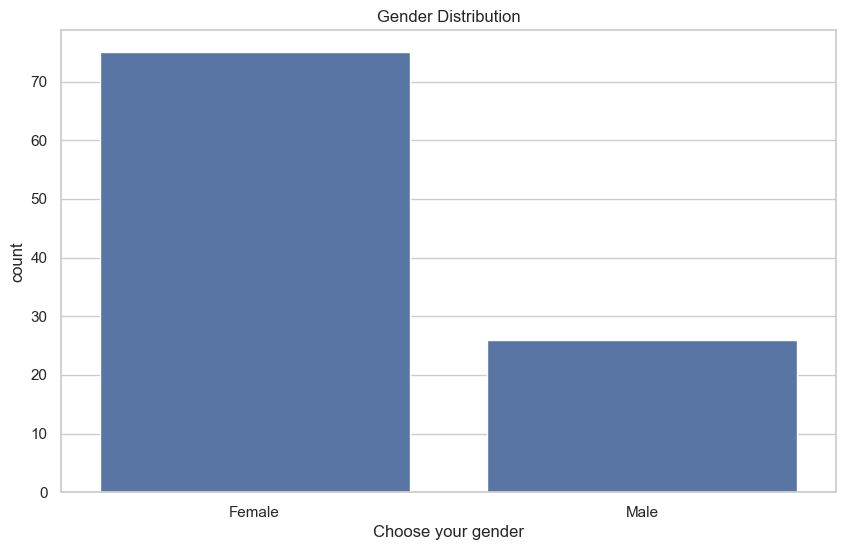

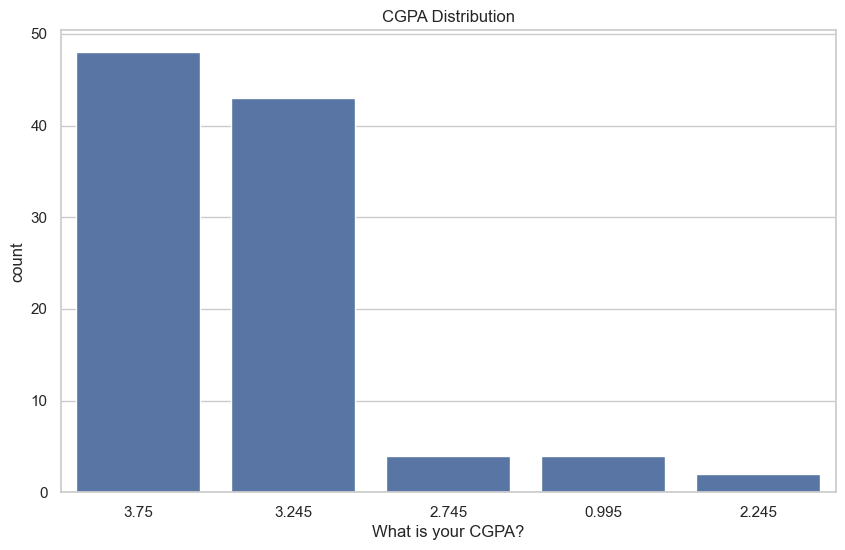

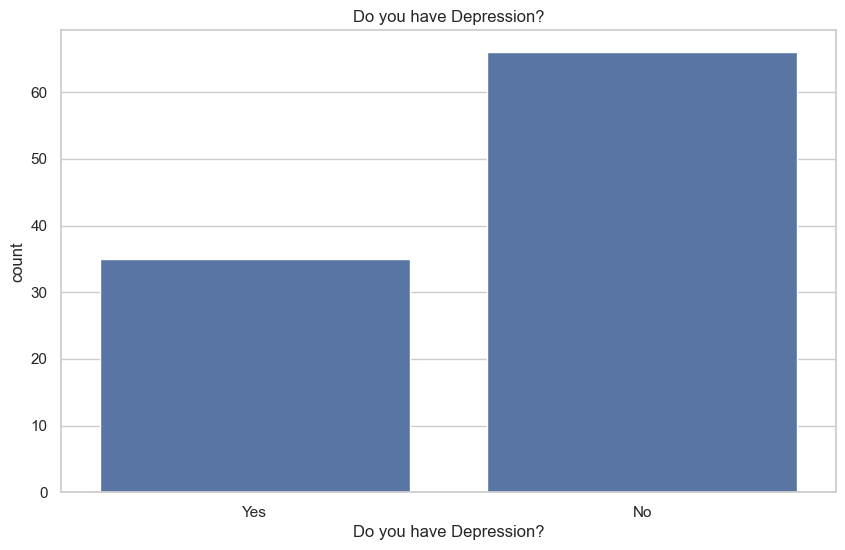

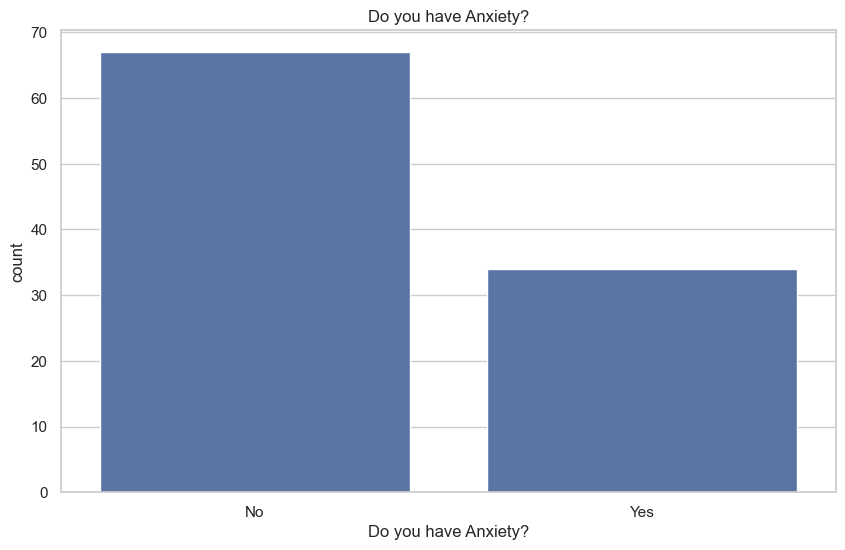

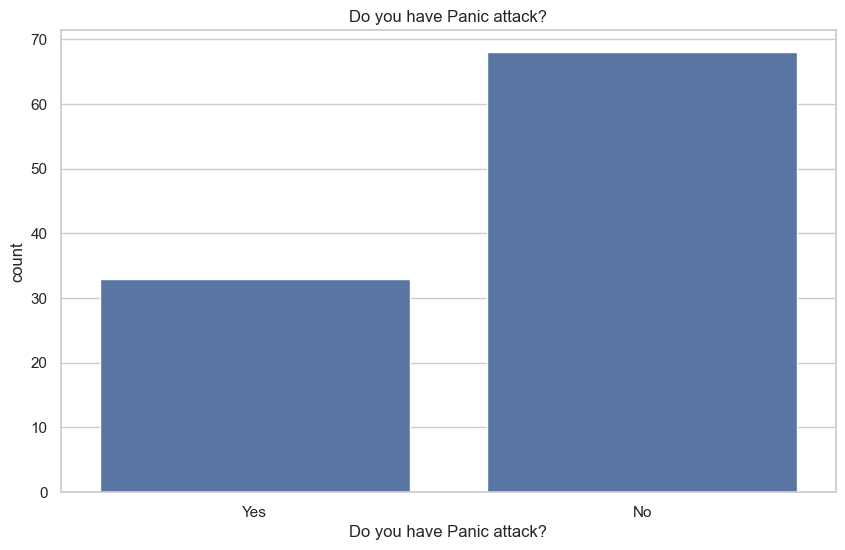

In [13]:

# Gender Distribution
sns.countplot(data=df, x='Choose your gender')
plt.title("Gender Distribution")
plt.show()

# CGPA Distribution
sns.countplot(data=df, x='What is your CGPA?', order=df['What is your CGPA?'].value_counts().index)
plt.title("CGPA Distribution")
plt.show()

# Mental Health Issues
for col in ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']:
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.show()

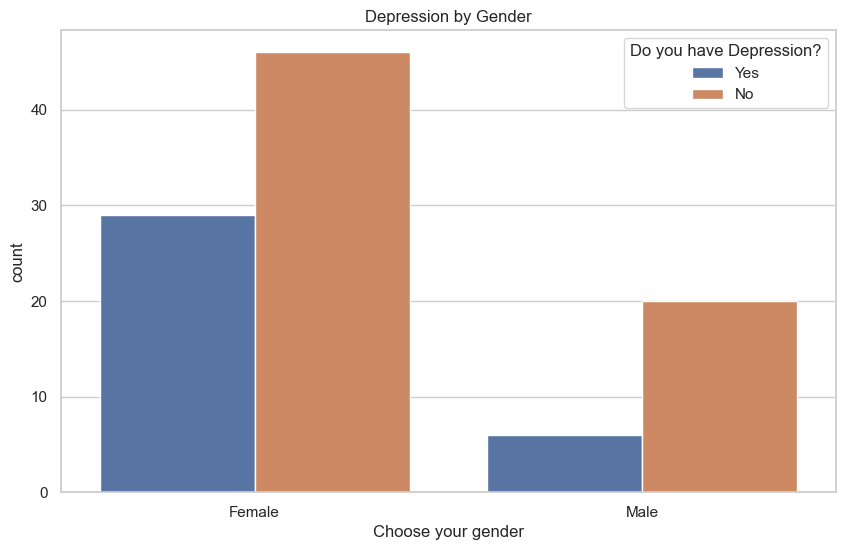

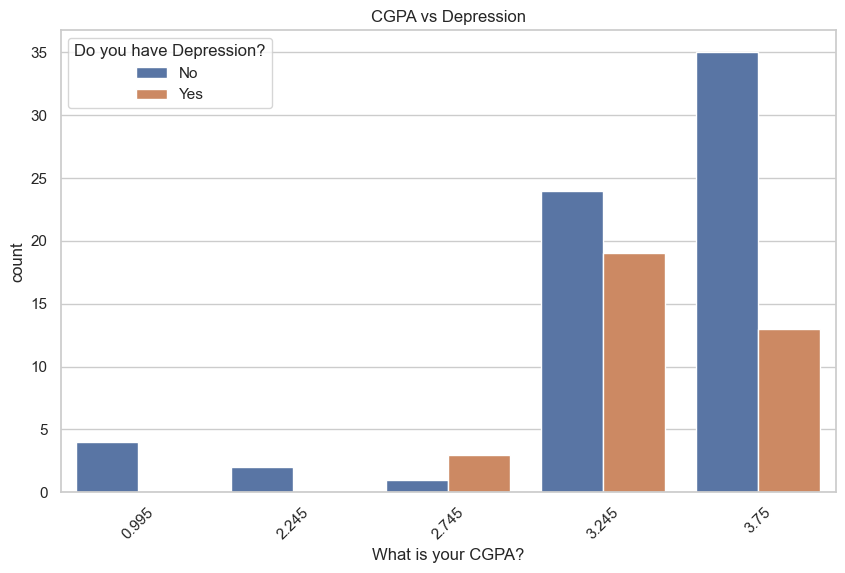

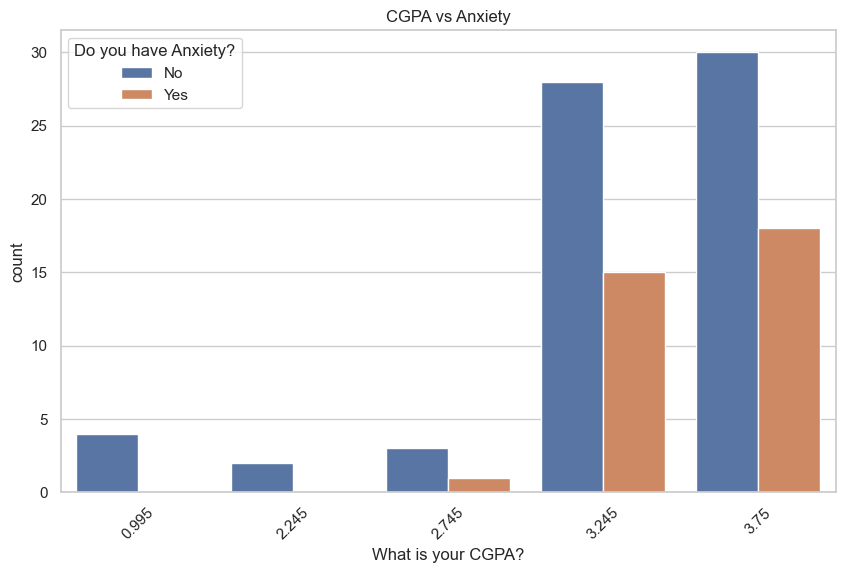

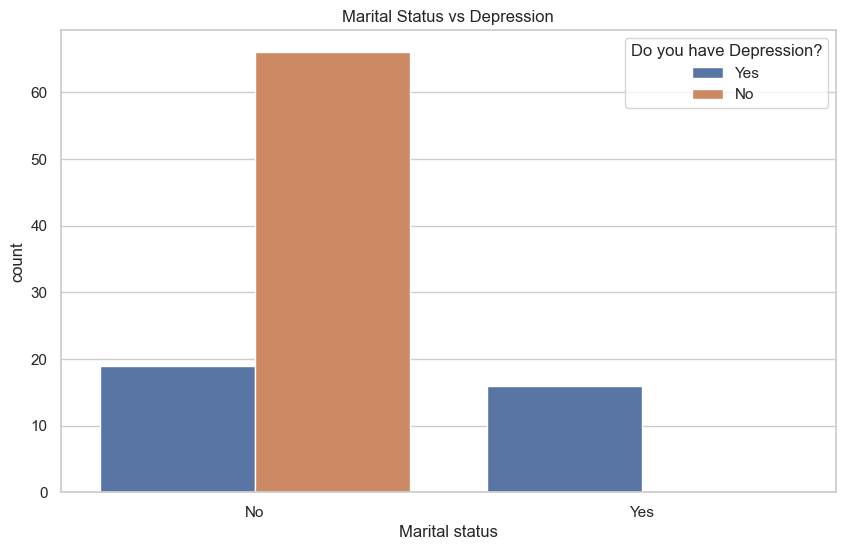

In [14]:
# Depression vs Gender
sns.countplot(data=df, x='Choose your gender', hue='Do you have Depression?')
plt.title("Depression by Gender")
plt.show()

# CGPA vs Mental Health Issues
sns.countplot(data=df, x='What is your CGPA?', hue='Do you have Depression?')
plt.title("CGPA vs Depression")
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='What is your CGPA?', hue='Do you have Anxiety?')
plt.title("CGPA vs Anxiety")
plt.xticks(rotation=45)
plt.show()

# Marital status vs Mental Health
sns.countplot(data=df, x='Marital status', hue='Do you have Depression?')
plt.title("Marital Status vs Depression")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_13800\1603507210.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_binary = df[binary_cols].replace({'Yes': 1, 'No': 0})


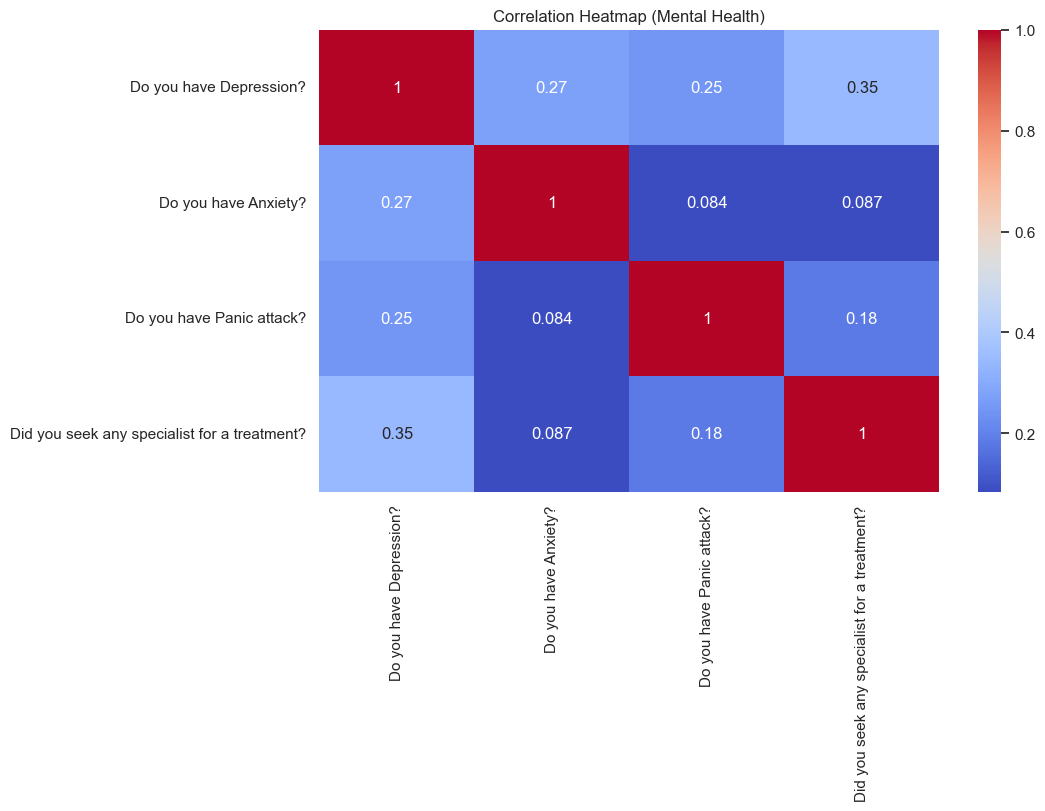

In [15]:
# Correlation matrix for binary columns (Yes/No -> 1/0)
binary_cols = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']
df_binary = df[binary_cols].replace({'Yes': 1, 'No': 0})

sns.heatmap(df_binary.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Mental Health)")
plt.show()


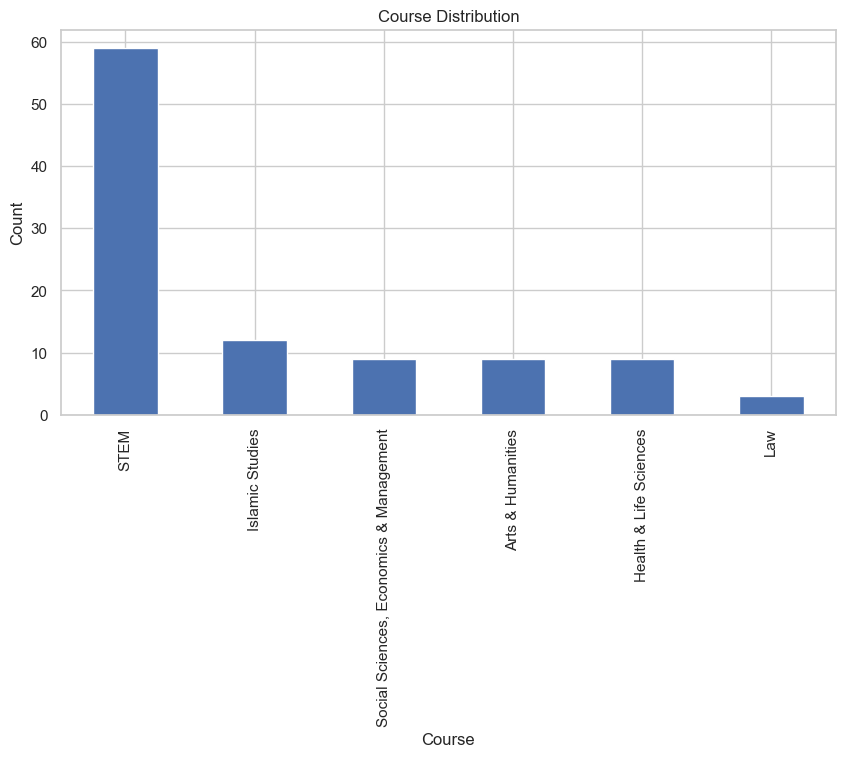

In [16]:
# Example: Distribution of Course
df['What is your course?'].value_counts().plot(kind='bar', figsize=(10,5), title='Course Distribution')
plt.xlabel("Course")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


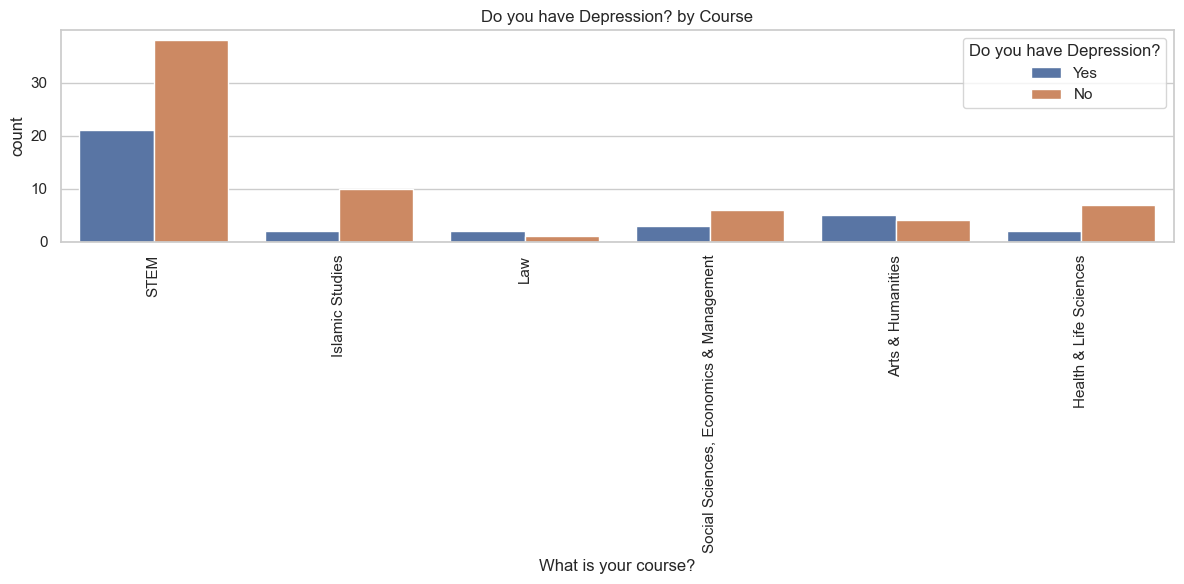

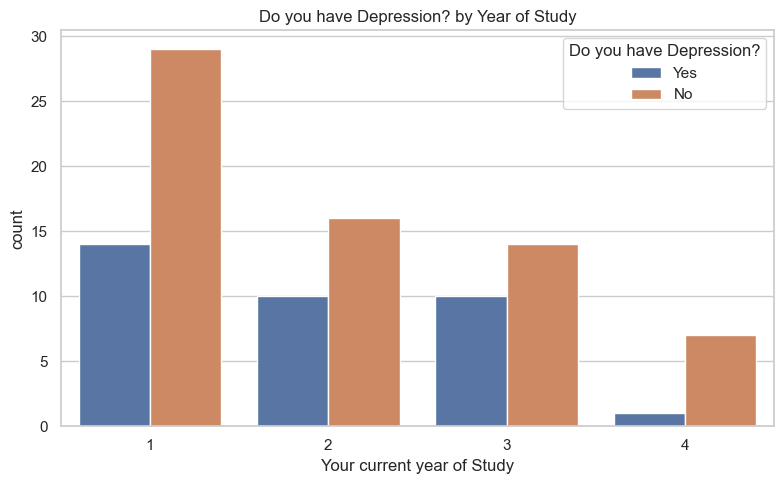

Do you have Depression?                     No    Yes
What is your course?                                 
Arts & Humanities                        44.44  55.56
Health & Life Sciences                   77.78  22.22
Islamic Studies                          83.33  16.67
Law                                      33.33  66.67
STEM                                     64.41  35.59
Social Sciences, Economics & Management  66.67  33.33
Chi-square Test p-value (Course vs Do you have Depression?): 0.36316176547721585


In [17]:
# Example: Crosstab between Course and a mental health question
question_col = 'Do you have Depression?'  # replace with actual column

# 1. Barplot: Mental Health response per Course
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='What is your course?', hue=question_col)
plt.title(f'{question_col} by Course')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Barplot: Mental Health response per Year
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Your current year of Study', hue=question_col)
plt.title(f'{question_col} by Year of Study')
plt.tight_layout()
plt.show()

# 3. Crosstab summary
course_summary = pd.crosstab(df['What is your course?'], df[question_col], normalize='index') * 100
print(course_summary.round(2))

# 4. Optional: Chi-square test of independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['What is your course?'], df[question_col])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test p-value (Course vs {question_col}):", p)

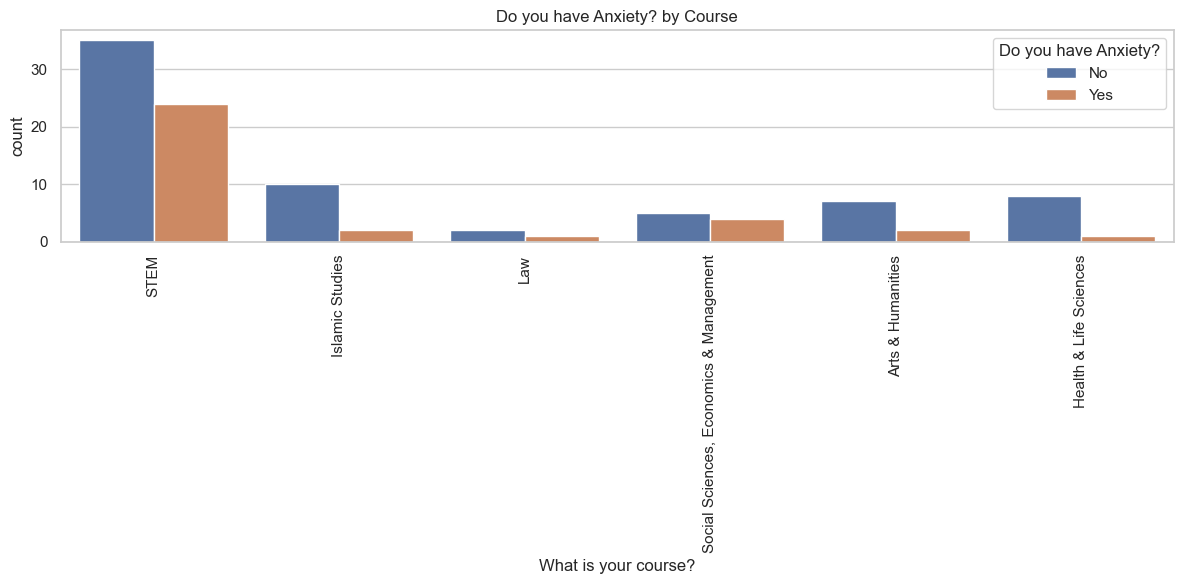

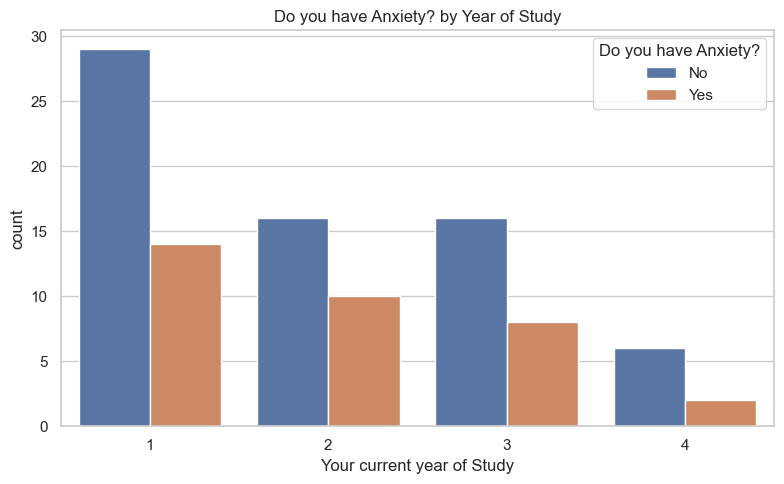

Do you have Anxiety?                        No    Yes
What is your course?                                 
Arts & Humanities                        77.78  22.22
Health & Life Sciences                   88.89  11.11
Islamic Studies                          83.33  16.67
Law                                      66.67  33.33
STEM                                     59.32  40.68
Social Sciences, Economics & Management  55.56  44.44
Chi-square Test p-value (Course vs Do you have Anxiety?): 0.31623669414914646


In [18]:
# Example: Crosstab between Course and a mental health question
question_col = 'Do you have Anxiety?'  # replace with actual column

# 1. Barplot: Mental Health response per Course
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='What is your course?', hue=question_col)
plt.title(f'{question_col} by Course')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Barplot: Mental Health response per Year
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Your current year of Study', hue=question_col)
plt.title(f'{question_col} by Year of Study')
plt.tight_layout()
plt.show()

# 3. Crosstab summary
course_summary = pd.crosstab(df['What is your course?'], df[question_col], normalize='index') * 100
print(course_summary.round(2))

# 4. Optional: Chi-square test of independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['What is your course?'], df[question_col])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test p-value (Course vs {question_col}):", p)


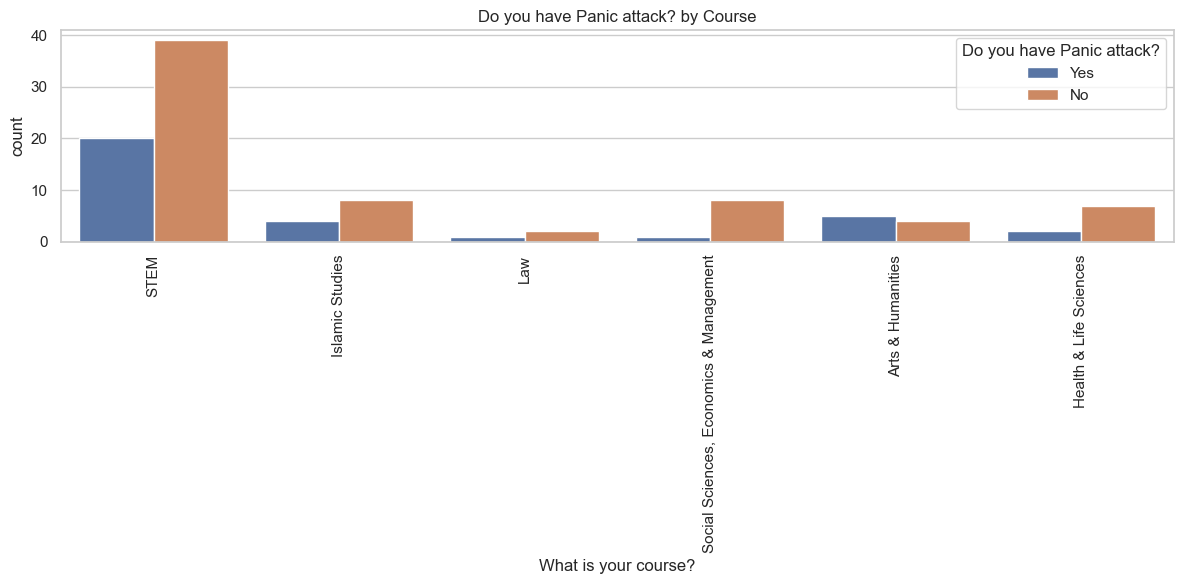

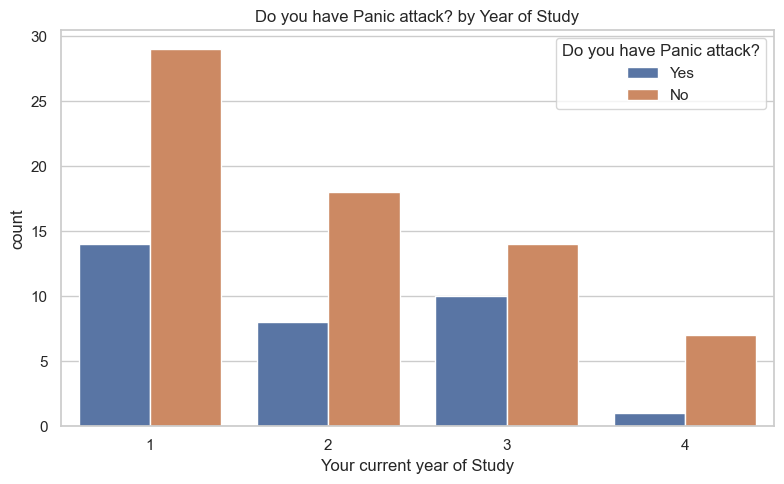

Do you have Panic attack?                   No    Yes
What is your course?                                 
Arts & Humanities                        44.44  55.56
Health & Life Sciences                   77.78  22.22
Islamic Studies                          66.67  33.33
Law                                      66.67  33.33
STEM                                     66.10  33.90
Social Sciences, Economics & Management  88.89  11.11
Chi-square Test p-value (Course vs Do you have Panic attack?): 0.4752864579511712


In [19]:
# Example: Crosstab between Course and a mental health question
question_col = 'Do you have Panic attack?'  # replace with actual column

# 1. Barplot: Mental Health response per Course
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='What is your course?', hue=question_col)
plt.title(f'{question_col} by Course')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Barplot: Mental Health response per Year
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Your current year of Study', hue=question_col)
plt.title(f'{question_col} by Year of Study')
plt.tight_layout()
plt.show()

# 3. Crosstab summary
course_summary = pd.crosstab(df['What is your course?'], df[question_col], normalize='index') * 100
print(course_summary.round(2))

# 4. Optional: Chi-square test of independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['What is your course?'], df[question_col])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test p-value (Course vs {question_col}):", p)

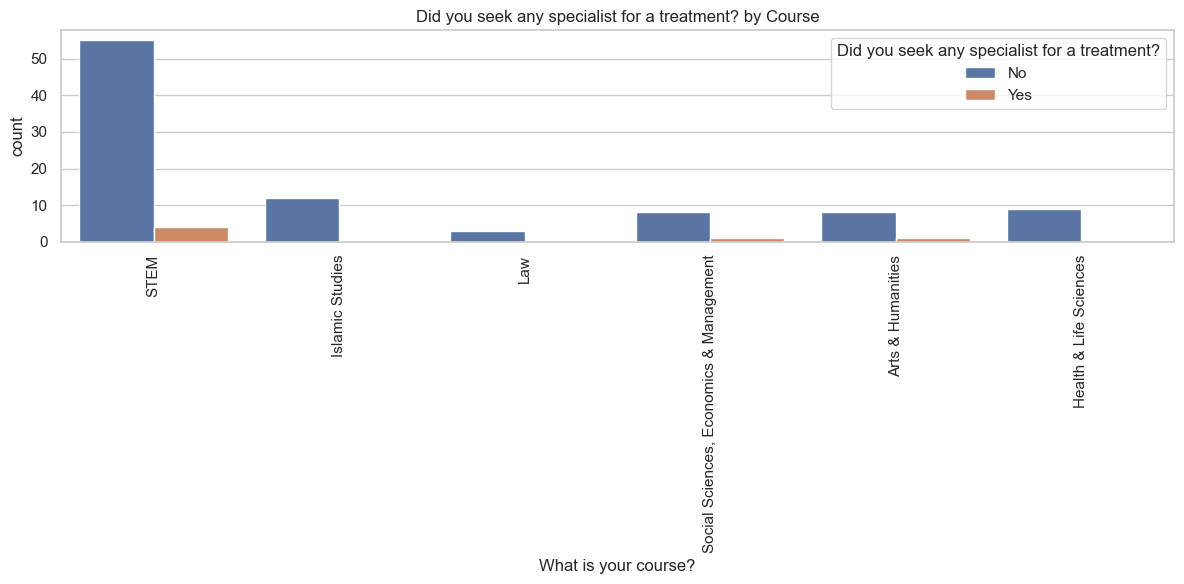

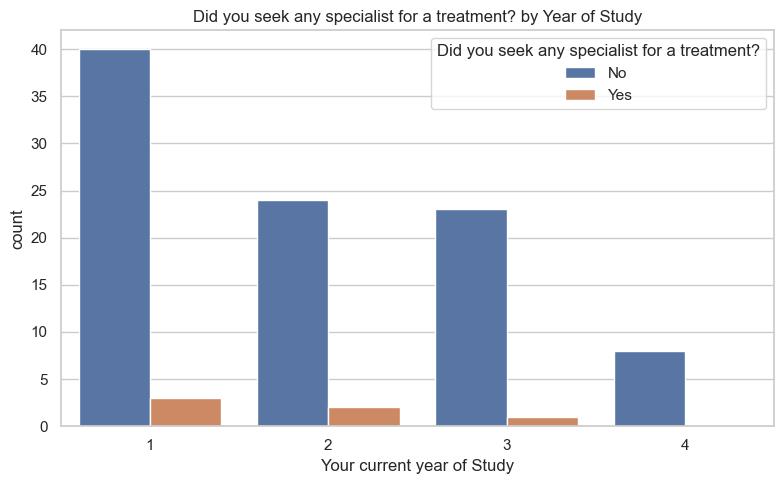

Did you seek any specialist for a treatment?      No    Yes
What is your course?                                       
Arts & Humanities                              88.89  11.11
Health & Life Sciences                        100.00   0.00
Islamic Studies                               100.00   0.00
Law                                           100.00   0.00
STEM                                           93.22   6.78
Social Sciences, Economics & Management        88.89  11.11
Chi-square Test p-value (Course vs Did you seek any specialist for a treatment?): 0.7838053985308167


In [20]:
# Example: Crosstab between Course and a mental health question
question_col = 'Did you seek any specialist for a treatment?'  # replace with actual column

# 1. Barplot: Mental Health response per Course
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='What is your course?', hue=question_col)
plt.title(f'{question_col} by Course')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Barplot: Mental Health response per Year
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Your current year of Study', hue=question_col)
plt.title(f'{question_col} by Year of Study')
plt.tight_layout()
plt.show()

# 3. Crosstab summary
course_summary = pd.crosstab(df['What is your course?'], df[question_col], normalize='index') * 100
print(course_summary.round(2))

# 4. Optional: Chi-square test of independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['What is your course?'], df[question_col])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test p-value (Course vs {question_col}):", p)

C:\Users\HP\AppData\Local\Temp\ipykernel_13800\899850647.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_binary[binary_cols] = df_binary[binary_cols].replace({'Yes': 1, 'No': 0})


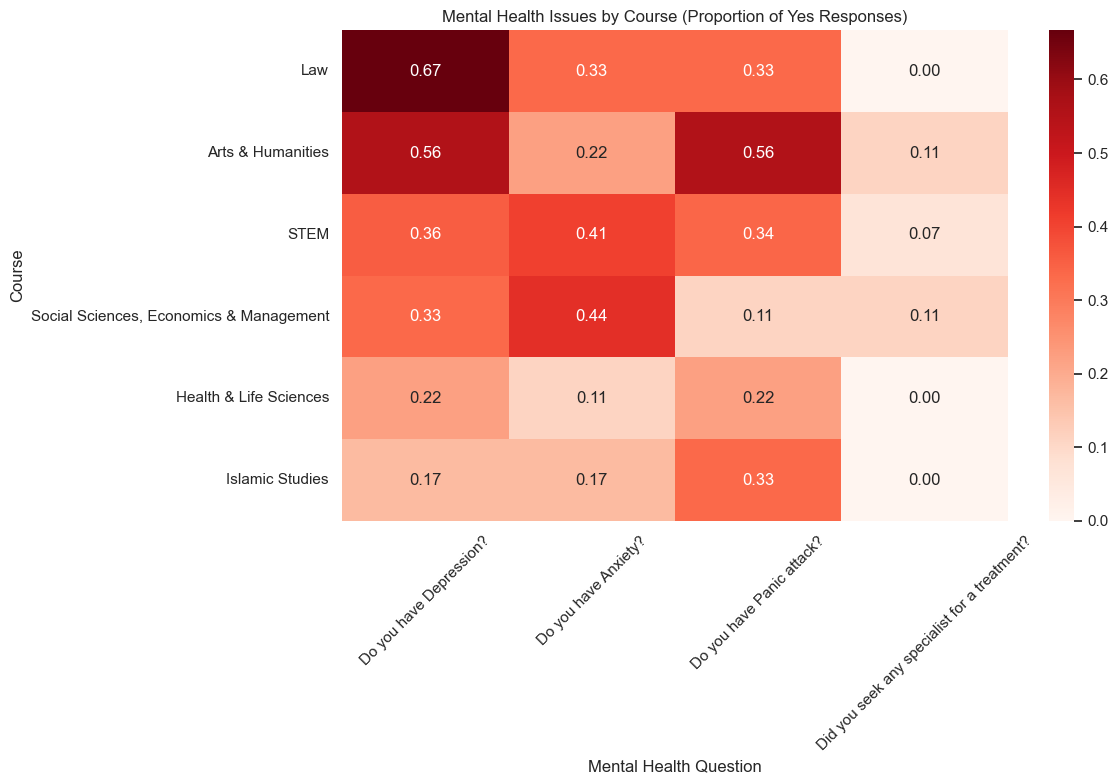

In [21]:
# # Convert Yes/No to 1/0 for easier aggregation
df_binary = df.copy()
binary_cols = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']
df_binary[binary_cols] = df_binary[binary_cols].replace({'Yes': 1, 'No': 0})

# Pivot table: average response (i.e., % answering Yes) by course
course_heatmap = df_binary.groupby('What is your course?')[binary_cols].mean().sort_values('Do you have Depression?', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(course_heatmap, annot=True, cmap='Reds', fmt=".2f")
plt.title("Mental Health Issues by Course (Proportion of Yes Responses)")
plt.ylabel("Course")
plt.xlabel("Mental Health Question")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
print(df.columns)

Index(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')


# DATA MODELLING, IMPLEMENTATION, MODEL EVALUATION

Create the target column and preprocess features

1. Create a binary target column has_mental_issue (1 if student has depression, anxiety, or panic attack, else 0).
2. Drop columns with the same value in all rows (low variance).
3. Ensure 'Your current year of Study' is numeric.
Convert 'What is your CGPA?' to a numeric value (midpoint if range).
4. Encode all categorical variables using LabelEncoder.
5. Separate features (X) and target (y), excluding the original mental health columns and the target column.
6. Impute missing values in features using the most frequent value.
7. Split the data into training and testing sets (80/20 split).
Save label encoders and imputer for future use.

In [ ]:
# Step 1: Create the target column
df["has_mental_issue"] = (
    (df["Do you have Depression?"] == "Yes")
    | (df["Do you have Anxiety?"] == "Yes")
    | (df["Do you have Panic attack?"] == "Yes")
).astype(
    int
)  # 1 = has issue, 0 = no issue

# Step 2: Drop columns with the same value in all rows
df = df.loc[:, df.nunique() > 1]

# Step 3: Preprocess specific columns
# Convert 'Your current year of Study' to numeric
df["Your current year of Study"] = (
    df["Your current year of Study"].astype(str).str.extract("(\d+)").astype(int)
)


# Convert 'What is your CGPA?' to numeric (midpoint of ranges)
def convert_cgpa(cgpa):
    if isinstance(cgpa, str) and "-" in cgpa:
        # If the value is a string and contains a range, calculate the midpoint
        low, high = map(float, cgpa.split("-"))
        return (low + high) / 2
    elif isinstance(cgpa, (int, float)):
        # If the value is already numeric, return it as-is
        return cgpa
    else:
        # Handle unexpected cases (e.g., NaN or invalid formats)
        return np.nan


df["What is your CGPA?"] = df["What is your CGPA?"].apply(convert_cgpa)

# Step 4: Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include="object").columns:
    df[column] = df[column].astype(str)  # ensure consistent type
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 5: Separate features and target
# Exclude the three columns used to create the target
columns_to_exclude = [
    "Do you have Depression?",
    "Do you have Anxiety?",
    "Do you have Panic attack?",
]
X = df.drop(columns=columns_to_exclude + ["has_mental_issue"], axis=1)
y = df["has_mental_issue"]

# Step 6: Impute missing values
imputer = SimpleImputer(strategy="most_frequent")
X_imputed = imputer.fit_transform(X)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# Save preprocessing artifacts
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(imputer, "imputer.pkl")

['imputer.pkl']

Train and evaluate Logistic Regression

1. Train a Logistic Regression model on the training data.
2. Print classification report (precision, recall, f1-score, support).
3. Print and plot the confusion matrix.
4. Print the accuracy score.
5. Save the trained Logistic Regression model.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.63      0.92      0.75        13

    accuracy                           0.62        21
   macro avg       0.57      0.52      0.47        21
weighted avg       0.58      0.62      0.54        21

Logistic Regression Confusion Matrix:
[[ 1  7]
 [ 1 12]]


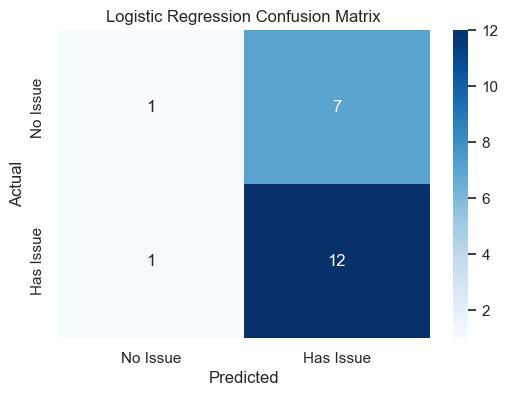

Logistic Regression Accuracy: 0.6190
Model and preprocessing artifacts saved successfully.


In [24]:
# Step 8: Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 9: Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg.predict(X_test)))
y_pred_logreg = logreg.predict(X_test)

# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logreg)

# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_logreg,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Issue", "Has Issue"],
    yticklabels=["No Issue", "Has Issue"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Accuracy Score for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

# Save the model and preprocessing artifacts
joblib.dump(logreg, "logreg_model.pkl")
print("Model and preprocessing artifacts saved successfully.")

Train and evaluate Decision Tree

1. Train a Decision Tree classifier on the training data.
2. Print classification report.
3. Print and plot the confusion matrix.
4. Print the accuracy score.
5. Save the trained Decision Tree model.

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.64      0.54      0.58        13

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.51        21
weighted avg       0.55      0.52      0.53        21

Decision Tree Confusion Matrix:
[[4 4]
 [6 7]]


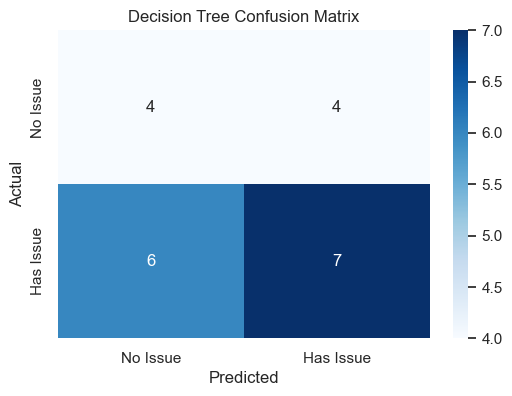

Decision Tree Accuracy: 0.5238
Model and preprocessing artifacts saved successfully.


In [ ]:


# Step 1: Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 2: Evaluation
y_pred_dt = decision_tree.predict(X_test)

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_dt,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Issue", "Has Issue"],
    yticklabels=["No Issue", "Has Issue"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Save the model and preprocessing artifacts
joblib.dump(decision_tree, "decision_tree_model.pkl")
print("Model and preprocessing artifacts saved successfully.")

Train and evaluate Random Forest

1. Train a Random Forest classifier on the training data.
2. Print classification report.
3. Print and plot the confusion matrix.
4. Print the accuracy score.
5. Save the trained Random Forest model.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.73      0.85      0.79        13

    accuracy                           0.71        21
   macro avg       0.70      0.67      0.68        21
weighted avg       0.71      0.71      0.70        21

Random Forest Confusion Matrix:
[[ 4  4]
 [ 2 11]]


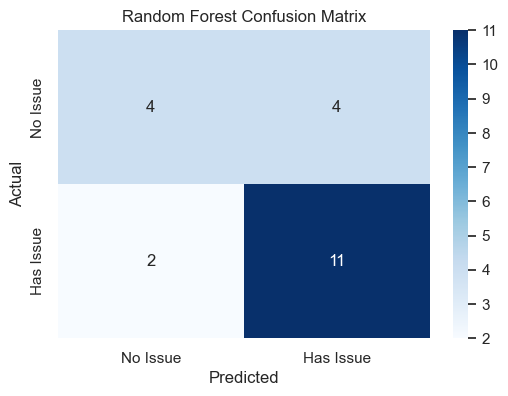

Random Forest Accuracy: 0.7143
Model and preprocessing artifacts saved successfully.


In [ ]:

# Step 1: Train Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Step 2: Evaluation
y_pred_rf = random_forest.predict(X_test)

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Issue", "Has Issue"],
    yticklabels=["No Issue", "Has Issue"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Save the model and preprocessing artifacts
joblib.dump(random_forest, "random_forest_model.pkl")

print("Model and preprocessing artifacts saved successfully.")

Save the imputer and all label encoders to disk for future inference or deployment.

In [27]:


# Save the imputer
joblib.dump(imputer, "imputer.pkl")

# Save all label encoders
joblib.dump(label_encoders, "label_encoders.pkl")

print("✅ All models, imputer, and encoders saved.")

✅ All models, imputer, and encoders saved.


Print the list of feature names used for model training (for reference or debugging).

In [28]:
print("Expected features:", X.columns.tolist())

Expected features: ['Choose your gender', 'Age', 'What is your course?', 'Your current year of Study', 'What is your CGPA?', 'Marital status', 'Did you seek any specialist for a treatment?']
